***Explore Essential Information from Text Data and Preprocessing***

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk import pos_tag

In [147]:
fake_news_df = pd.read_csv(r"path\to\data\fake.csv")
true_news_df = pd.read_csv(r"path\to\\data\true.csv")
fake_news_df_backup = fake_news_df
true_news_df_backup = true_news_df

In [148]:
fake_news_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [149]:
true_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [151]:
stop_words = set(stopwords.words('english'))
wordnet_lem = WordNetLemmatizer()
eng_stems = SnowballStemmer('english')

All three columns viz title, text and subject are important for ML algos.

In [152]:
def Data_Cleaning(df, ColumnName):
    fdist = []
    for i in range(len(df[ColumnName])):
        tokens = word_tokenize(df[ColumnName][i].lower())
        removed_stopwords = [word for word in tokens if (not word in stop_words) and (word.isalpha())]
        for k in removed_stopwords:
            fdist.append(k)
        lemmas = [wordnet_lem.lemmatize(word) for word in removed_stopwords]
        stems = [eng_stems.stem(word) for word in lemmas]
        df[ColumnName][i] = stems
    fdist = FreqDist(fdist)
    return df, fdist

In [153]:
fake_news_df, most_common_fake_title = Data_Cleaning(fake_news_df, "title")
fake_news_df, most_common_fake_text = Data_Cleaning(fake_news_df, "text")
true_news_df, most_common_true_title = Data_Cleaning(true_news_df, "title")
true_news_df, most_common_true_text = Data_Cleaning(true_news_df, "text")

In [154]:
fake_news_df_backup2 = fake_news_df
true_news_df_backup2 = true_news_df

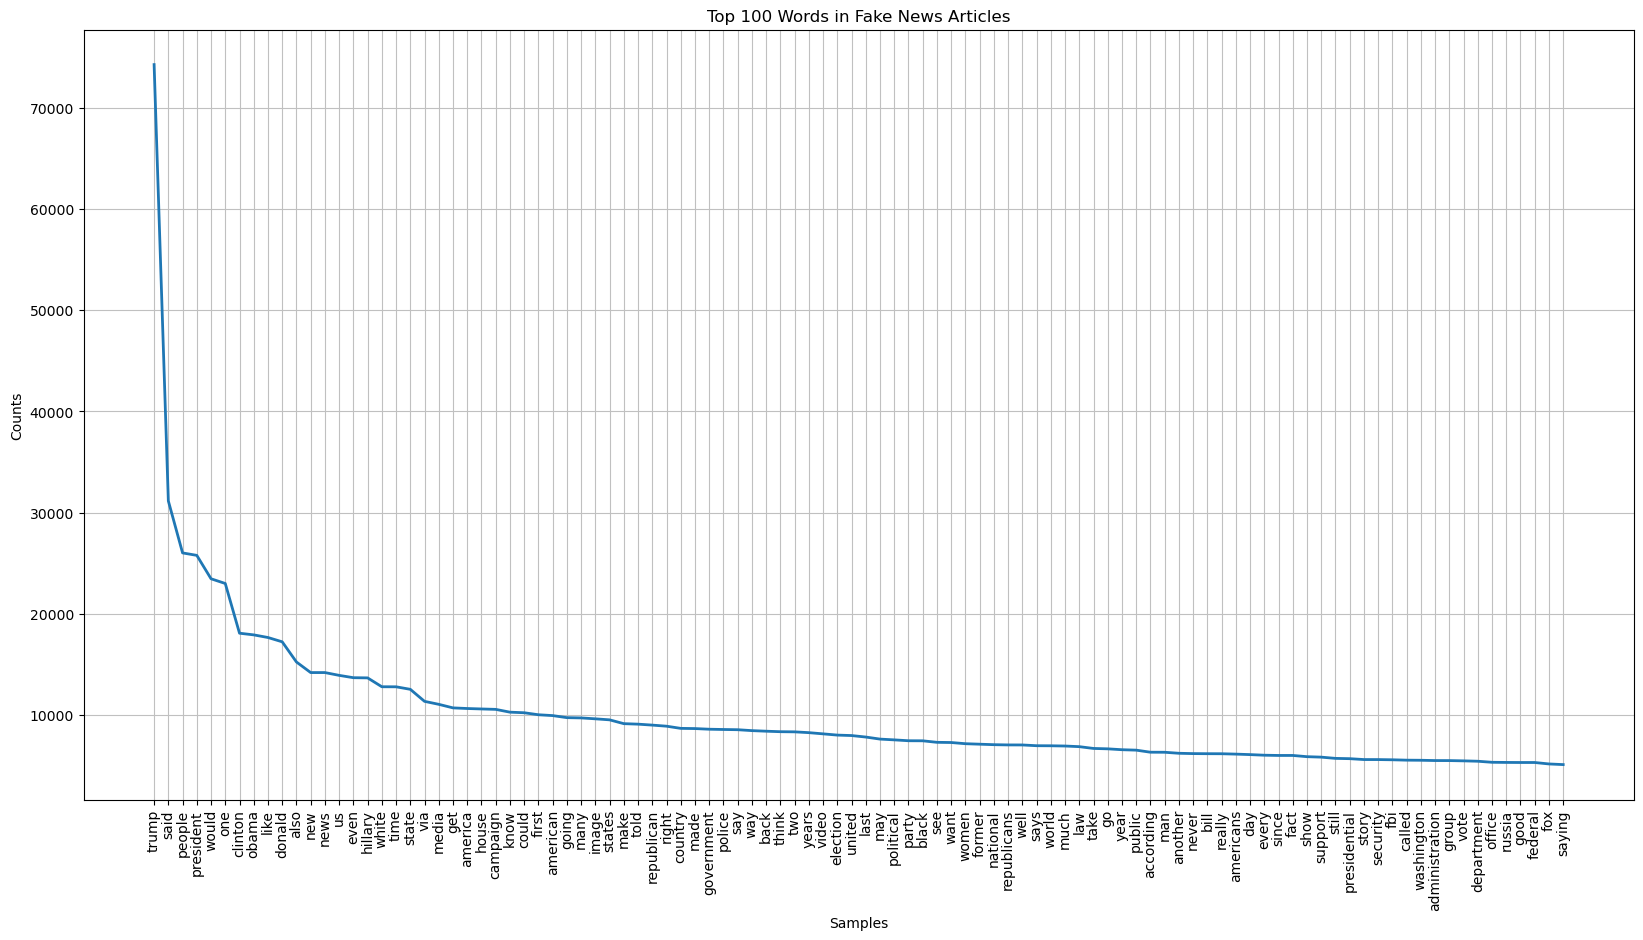

In [155]:
plt.figure(figsize=(20, 10))
plt.title("Top 100 Words in Fake News Articles")
most_common_fake_text.plot(100)
plt.show()

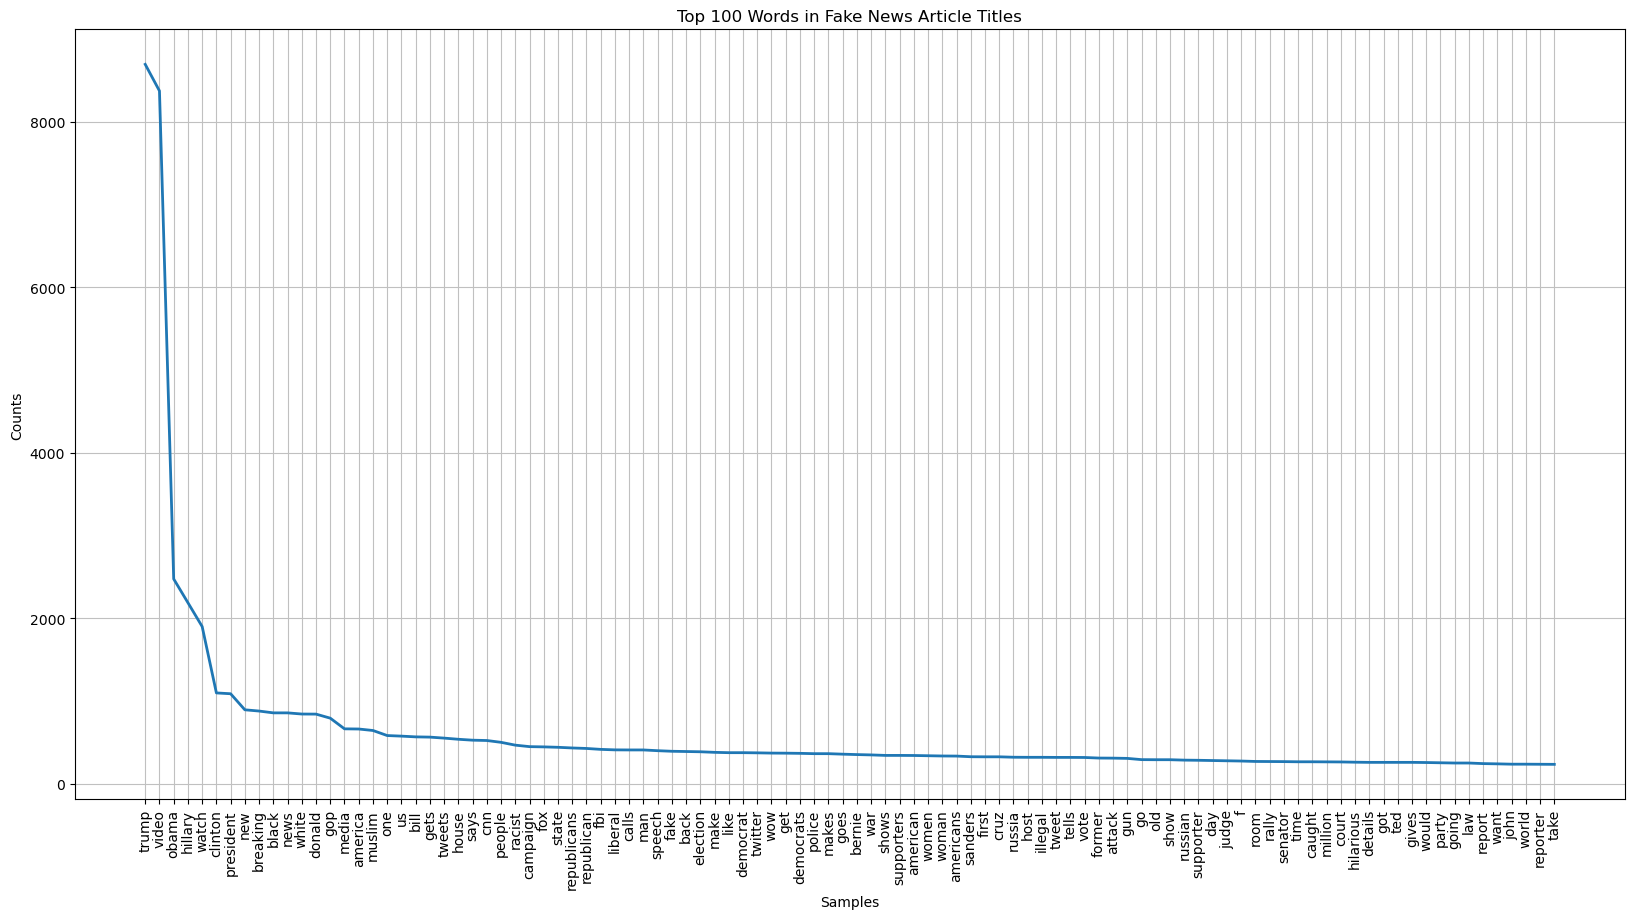

In [156]:
plt.figure(figsize=(20, 10))
plt.title("Top 100 Words in Fake News Article Titles")
most_common_fake_title.plot(100)
plt.show()

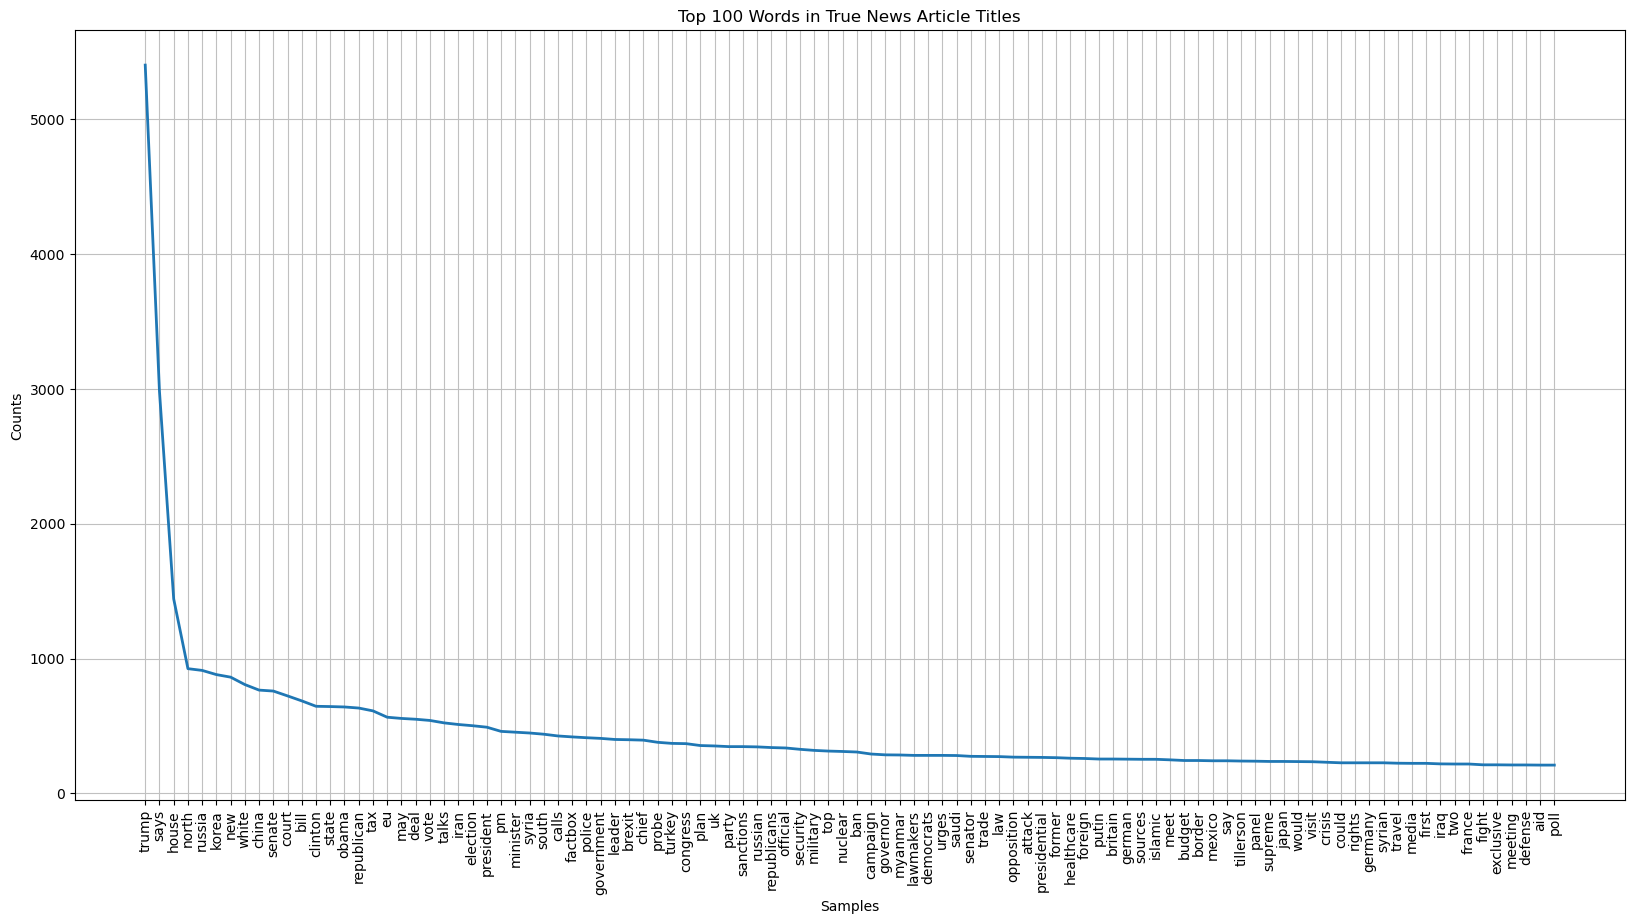

In [157]:
plt.figure(figsize=(20, 10))
plt.title("Top 100 Words in True News Article Titles")
most_common_true_title.plot(100)
plt.show()

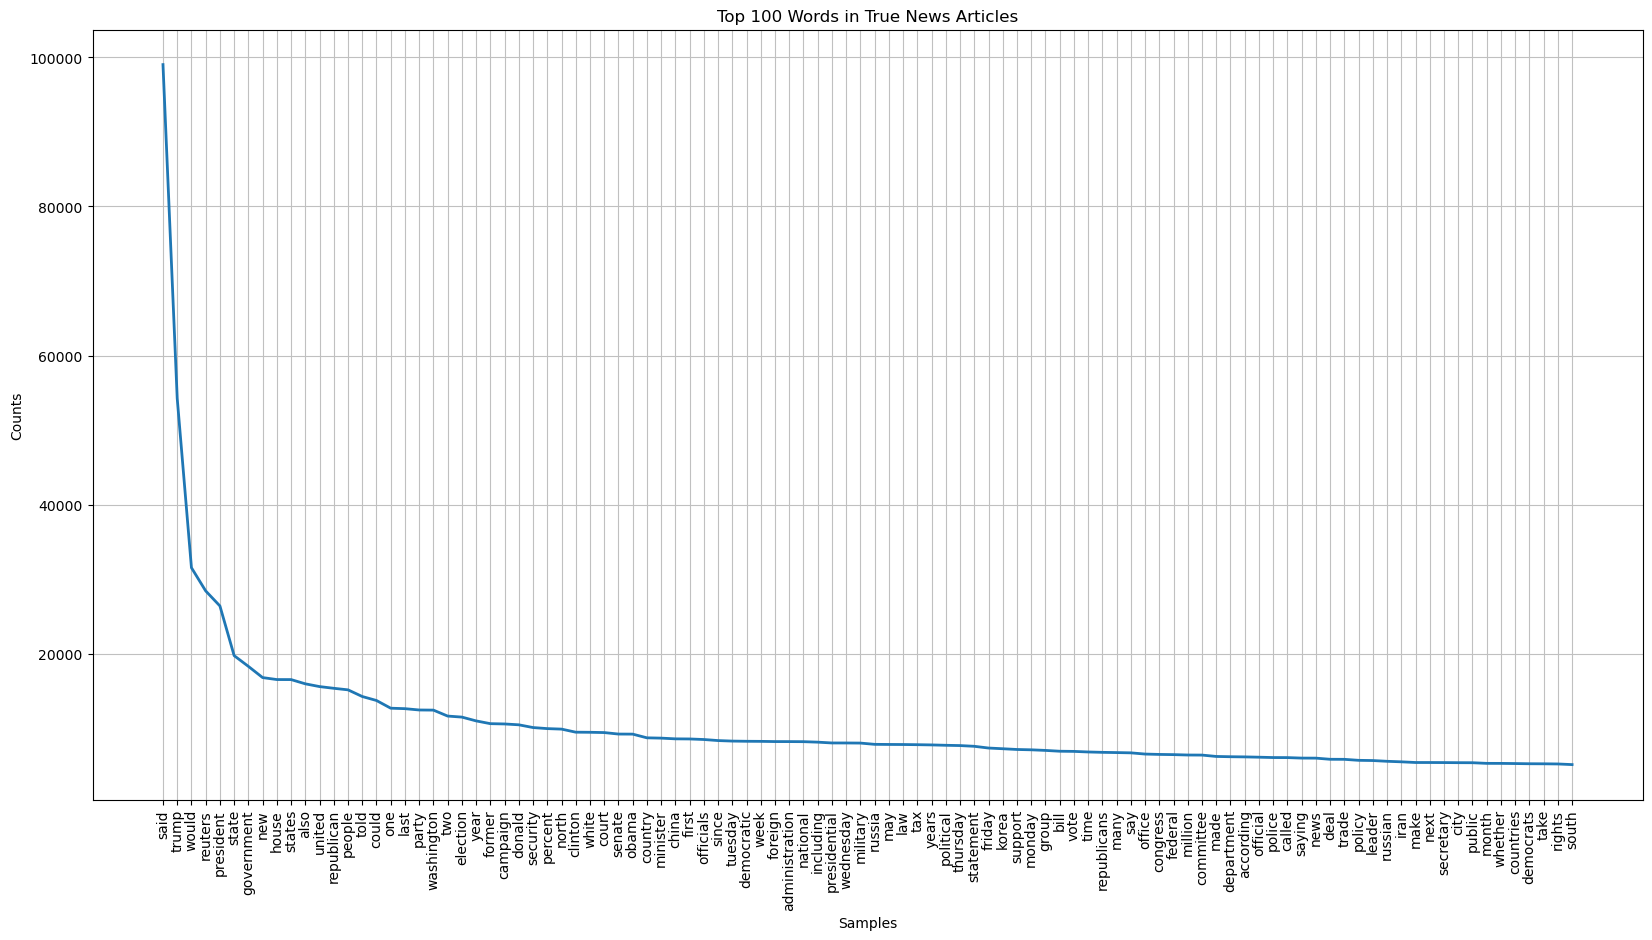

In [158]:
plt.figure(figsize=(20, 10))
plt.title("Top 100 Words in True News Articles")
most_common_true_text.plot(100)
plt.show()

***Build Machine Learning Model***

In [159]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [160]:
fake_news_df['label'] = 0
true_news_df['label'] = 1

In [161]:
fake_news_df.shape

(23481, 5)

In [162]:
true_news_df.shape

(21417, 5)

In [163]:
df = pd.concat([fake_news_df, true_news_df])

In [164]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,"[megyn, kelli, reveal, creepi, way, donald, tr...","[donald, trump, singl, mani, peopl, campaign, ...",News,"January 4, 2016",0
1,"[watch, black, driver, brave, shame, cop, drew...","[black, america, get, pull, cop, even, smalles...",News,"September 10, 2017",0
2,"[matti, look, way, bring, russia, complianc, a...","[brussel, reuter, defens, secretari, jim, matt...",politicsNews,"November 9, 2017",1
3,"[harm, disastr, opinion, antonin, scalia, care...","[justic, antonin, scalia, impress, career, app...",News,"February 14, 2016",0
4,"[maxin, water, peopl, tri, discredit, video]","[maxin, got, makeov, hop, mad, specul, run, po...",left-news,"Jul 22, 2017",0


In [165]:
df.shape

(44898, 5)

In [166]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [167]:
df['title'] = df['title'].apply(lambda x: ' '.join(x))
df['text'] = df['text'].apply(lambda y: ' '.join(y))

In [168]:
df.head()

,title,text,subject,date,label
0,megyn kelli reveal creepi way donald trump tri...,donald trump singl mani peopl campaign none re...,News,"January 4, 2016",0
1,watch black driver brave shame cop drew gun tu...,black america get pull cop even smallest infra...,News,"September 10, 2017",0
2,matti look way bring russia complianc arm cont...,brussel reuter defens secretari jim matti said...,politicsNews,"November 9, 2017",1
3,harm disastr opinion antonin scalia career quot,justic antonin scalia impress career appoint s...,News,"February 14, 2016",0
4,maxin water peopl tri discredit video,maxin got makeov hop mad specul run potus help...,left-news,"Jul 22, 2017",0


In [169]:
counter = CountVectorizer()

In [171]:
df1 = df

In [172]:
df1["combined_text"] = df1['title'] + df1['text']

In [173]:
X = counter.fit_transform(df1["combined_text"])

In [174]:
vocabulary = counter.get_feature_names_out()
document_term_matrix = X.toarray()

In [175]:
document_term_matrix = document_term_matrix.astype(np.uint8)

In [177]:
x_train, x_test, y_train, y_test = train_test_split(document_term_matrix, df1["label"], test_size=0.2, random_state=42)

In [178]:
x_train = csr_matrix(x_train)
x_test = csr_matrix(x_test)

***NAIVE BAYES BOW***

In [179]:
NB = MultinomialNB()

In [180]:
NB_BoW_model = NB.fit(x_train, y_train)

In [181]:
NB_BoW_Results_train = NB_BoW_model.predict(x_train)

In [182]:
NB_BoW_Results_train = accuracy_score(NB_BoW_Results_train, y_train)
NB_BoW_Results_train*100

95.39228242107022

In [183]:
NB_BoW_Results = NB_BoW_model.predict(x_test)

In [184]:
NB_BoW_Acc = accuracy_score(NB_BoW_Results, y_test)
NB_BoW_Acc*100

94.78841870824053

In [185]:
NB_Conf_Matrix = confusion_matrix(NB_BoW_Results, y_test)
NB_Conf_Matrix

array([[4417,  222],
       [ 246, 4095]], dtype=int64)

In [186]:
NB_BoW_Report = classification_report(NB_BoW_Results, y_test)
print(NB_BoW_Report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4639
           1       0.95      0.94      0.95      4341

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



***RANDOM FOREST BOW***

In [187]:
RF = RandomForestClassifier()

In [188]:
RF_BoW_model = RF.fit(x_train, y_train)

In [189]:
RF_BoW_Results_train = RF_BoW_model.predict(x_train)

In [190]:
RF_BoW_Acc_train = accuracy_score(RF_BoW_Results_train, y_train)
RF_BoW_Acc_train*100

100.0

In [191]:
RF_Conf_Matrix_train = confusion_matrix(RF_BoW_Results_train, y_train)
RF_Conf_Matrix_train

array([[18818,     0],
       [    0, 17100]], dtype=int64)

In [192]:
RF_BoW_Results = RF_BoW_model.predict(x_test)

In [193]:
RF_BoW_Acc = accuracy_score(RF_BoW_Results, y_test)
RF_BoW_Acc*100

98.61915367483296

In [194]:
RF_Conf_Matrix = confusion_matrix(RF_BoW_Results, y_test)
RF_Conf_Matrix

array([[4595,   56],
       [  68, 4261]], dtype=int64)

In [195]:
RF_BoW_Report = classification_report(RF_BoW_Results, y_test)
print(RF_BoW_Report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4651
           1       0.99      0.98      0.99      4329

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



***DECISION TREE BOW***

In [196]:
DT = DecisionTreeClassifier()

In [197]:
DT_BoW_model = DT.fit(x_train, y_train)

In [198]:
DT_BoW_Results_train = DT_BoW_model.predict(x_train)

In [199]:
DT_BoW_Acc_train = accuracy_score(DT_BoW_Results_train, y_train)
DT_BoW_Acc_train*100

100.0

In [200]:
DT_Conf_Matrix_train = confusion_matrix(DT_BoW_Results_train, y_train)
DT_Conf_Matrix_train

array([[18818,     0],
       [    0, 17100]], dtype=int64)

In [201]:
DT_BoW_Results = DT_BoW_model.predict(x_test)

In [202]:
DT_BoW_Acc = accuracy_score(DT_BoW_Results, y_test)
DT_BoW_Acc*100

97.87305122494432

In [203]:
DT_Conf_Matrix = confusion_matrix(DT_BoW_Results, y_test)
DT_Conf_Matrix

array([[4597,  125],
       [  66, 4192]], dtype=int64)

In [204]:
DT_BoW_Report = classification_report(DT_BoW_Results, y_test)
print(DT_BoW_Report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4722
           1       0.97      0.98      0.98      4258

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



***Implementing TF-IDF***

In [205]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(df1["combined_text"], df1["label"], test_size=0.2, random_state=42)

In [206]:
tfidf_vect = TfidfVectorizer()

In [207]:
x_train_tfidf = tfidf_vect.fit_transform(x_train_tfidf)
x_test_tfidf = tfidf_vect.transform(x_test_tfidf)

***Naive Bayes TF-IDF***

In [208]:
NB_TFIDF_Model = NB.fit(x_train_tfidf, y_train_tfidf)

In [209]:
NB_TFIDF_Results_train = NB_TFIDF_Model.predict(x_train_tfidf)

In [210]:
NB_TFIDF_Acc_train = accuracy_score(NB_TFIDF_Results_train, y_train_tfidf)
NB_TFIDF_Acc_train*100

93.66891252296898

In [211]:
NB_TFIDF_train_conf_mat = confusion_matrix(NB_TFIDF_Results_train, y_train_tfidf)
NB_TFIDF_train_conf_mat

array([[17883,  1339],
       [  935, 15761]], dtype=int64)

In [212]:
NB_TFIDF_Results = NB_TFIDF_Model.predict(x_test_tfidf)

In [213]:
NB_TFIDF_Acc = accuracy_score(NB_TFIDF_Results, y_test_tfidf)
NB_TFIDF_Acc*100

93.10690423162583

In [214]:
NB_TFIDF_conf_mat = confusion_matrix(NB_TFIDF_Results, y_test_tfidf)
NB_TFIDF_conf_mat

array([[4417,  373],
       [ 246, 3944]], dtype=int64)

In [215]:
NB_TFIDF_report = classification_report(NB_TFIDF_Results, y_test_tfidf)
print(NB_TFIDF_report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4790
           1       0.91      0.94      0.93      4190

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



***Random Forest TF-IDF***

In [216]:
RF_TFIDF_Model = RF.fit(x_train_tfidf, y_train_tfidf)

In [217]:
RF_TFIDF_Results_train = RF_TFIDF_Model.predict(x_train_tfidf)

In [218]:
RF_TFIDF_Acc_train = accuracy_score(RF_TFIDF_Results_train, y_train_tfidf)
RF_TFIDF_Acc_train*100

100.0

In [219]:
RF_TFIDF_train_conf_mat = confusion_matrix(RF_TFIDF_Results_train, y_train_tfidf)
RF_TFIDF_train_conf_mat

array([[18818,     0],
       [    0, 17100]], dtype=int64)

In [220]:
RF_TFIDF_Results = RF_TFIDF_Model.predict(x_test_tfidf)

In [221]:
RF_TFIDF_Acc = accuracy_score(RF_TFIDF_Results, y_test_tfidf)
RF_TFIDF_Acc*100

98.65256124721603

In [222]:
RF_TFIDF_conf_mat = confusion_matrix(RF_TFIDF_Results, y_test_tfidf)
RF_TFIDF_conf_mat

array([[4605,   63],
       [  58, 4254]], dtype=int64)

In [223]:
RF_TFIDF_report = classification_report(RF_TFIDF_Results, y_test_tfidf)
print(RF_TFIDF_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4668
           1       0.99      0.99      0.99      4312

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



***Decision Tree TF-IDF***

In [224]:
DT_TFIDF_Model = DT.fit(x_train_tfidf, y_train_tfidf)

In [225]:
DT_TFIDF_Results_train = DT_TFIDF_Model.predict(x_train_tfidf)

In [226]:
DT_TFIDF_Acc_train = accuracy_score(DT_TFIDF_Results_train, y_train_tfidf)
DT_TFIDF_Acc_train*100

100.0

In [227]:
DT_TFIDF_train_conf_mat = confusion_matrix(DT_TFIDF_Results_train, y_train_tfidf)
DT_TFIDF_train_conf_mat

array([[18818,     0],
       [    0, 17100]], dtype=int64)

In [228]:
DT_TFIDF_Results = DT_TFIDF_Model.predict(x_test_tfidf)

In [229]:
DT_TFIDF_Acc = accuracy_score(DT_TFIDF_Results, y_test_tfidf)
DT_TFIDF_Acc*100

97.73942093541203

In [230]:
DT_TFIDF_conf_mat = confusion_matrix(DT_TFIDF_Results, y_test_tfidf)
DT_TFIDF_conf_mat

array([[4578,  118],
       [  85, 4199]], dtype=int64)

In [231]:
DT_TFIDF_report = classification_report(DT_TFIDF_Results, y_test_tfidf)
print(DT_TFIDF_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4696
           1       0.97      0.98      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



***Enhanced NLP Features***

In [232]:
fake_news_df = pd.read_csv(r"path\to\data\fake.csv")
true_news_df = pd.read_csv(r"path\to\data\true.csv")
fake_news_df_backup = fake_news_df
true_news_df_backup = true_news_df

In [233]:
def Pos_tagging_nouns(df, ColumnName):
    for i in range(len(df[ColumnName])):
        tag_words = []
        tokens = word_tokenize(df[ColumnName][i].lower())
        removed_stopwords = [word for word in tokens if (not word in stop_words) and (word.isalpha())]
        lemmas = [wordnet_lem.lemmatize(word) for word in removed_stopwords]
        stems = [eng_stems.stem(word) for word in lemmas]
        pos_tags = pos_tag(stems)
        for j in range(len(pos_tags)):
            if pos_tags[j][1] in ["NN", "NNS" ,"NNP", "NNPS"]:
                tag_words.append(pos_tags[j][0])
        df[ColumnName][i] = tag_words
    return df

In [234]:
fake_news_df = Pos_tagging_nouns(fake_news_df, 'title')
fake_new_df = Pos_tagging_nouns(fake_news_df, 'text')
true_news_df = Pos_tagging_nouns(true_news_df, 'title')
true_news_df = Pos_tagging_nouns(true_news_df, 'text')

In [235]:
fake_new_df.head()

,title,text,subject,date
0,"[trump, embarrass, year, messag, disturb]","[donald, trump, happi, year, leav, shout, enem...",News,"December 31, 2017"
1,"[drunk, brag, trump, start, collus, investig]","[intellig, committe, chairman, devin, nune, da...",News,"December 31, 2017"
2,"[sheriff, david, clark, becom, internet, joke,...","[milwauke, sheriff, david, clark, consid, home...",News,"December 30, 2017"
3,"[trump, name, code, websit, imag]","[day, trump, announc, work, day, golf, day, re...",News,"December 29, 2017"
4,"[pope, franci, call, donald, trump, christma, ...","[pope, franci, christma, day, rebuk, donald, t...",News,"December 25, 2017"


In [236]:
true_news_df.head()

,title,text,subject,date
0,"[budget, fight, loom, flip, script]","[washington, reuter, head, faction, congress, ...",politicsNews,"December 31, 2017"
1,"[militari, recruit, monday, pentagon]","[washington, reuter, peopl, time, enlist, star...",politicsNews,"December 29, 2017"
2,"[senat, mueller, job]","[washington, reuter, counsel, investig, link, ...",politicsNews,"December 31, 2017"
3,"[fbi, russia, probe, help, diplomat, nyt]","[washington, reuter, trump, campaign, georg, p...",politicsNews,"December 30, 2017"
4,"[trump, charg, amazon, shipment]","[reuter, presid, donald, trump, call, servic, ...",politicsNews,"December 29, 2017"


In [237]:
fake_news_df['label'] = 0
true_news_df['label'] = 1

In [238]:
fake_news_df_backup_1 = fake_new_df
true_news_df_backup_1 = true_news_df

In [239]:
df3 = pd.concat([fake_news_df, true_news_df])

In [240]:
df3 = df3.sample(frac=1).reset_index(drop=True)
df3.head()

,title,text,subject,date,label
0,"[vow, fight, syria, denounc, deal]","[beirut, reuter, al, qaeda, branch, syria, fig...",worldnews,"September 16, 2017",1
1,"[senat, ask, fbi, probe, icahn, biofuel, push]","[washington, reuter, democrat, senat, wednesda...",politicsNews,"August 30, 2017",1
2,"[dutch, join, austria, road, toll, plan]","[reuter, dutch, govern, join, austria, court, ...",worldnews,"December 13, 2017",1
3,"[clinton, deceit, bet]","[lawyer, conspir, constitut, rule, rule, commi...",left-news,"Apr 15, 2015",0
4,"[minist, visit, syria, raqqa, talk]","[beirut, reuter, saudi, visit, syria, envoy, d...",worldnews,"October 19, 2017",1


In [241]:
df3['title'] = df3['title'].apply(lambda a: ' '.join(a))
df3['text'] = df3['text'].apply(lambda b: ' '.join(b))

In [242]:
df3.head()

,title,text,subject,date,label
0,vow fight syria denounc deal,beirut reuter al qaeda branch syria fight forc...,worldnews,"September 16, 2017",1
1,senat ask fbi probe icahn biofuel push,washington reuter democrat senat wednesday fbi...,politicsNews,"August 30, 2017",1
2,dutch join austria road toll plan,reuter dutch govern join austria court plan ro...,worldnews,"December 13, 2017",1
3,clinton deceit bet,lawyer conspir constitut rule rule committe ru...,left-news,"Apr 15, 2015",0
4,minist visit syria raqqa talk,beirut reuter saudi visit syria envoy discus r...,worldnews,"October 19, 2017",1


In [243]:
df3["combined_text"] = df3['title'] + df3['text']

In [244]:
X1 = counter.fit_transform(df3["combined_text"])

In [245]:
vocabulary1 = counter.get_feature_names_out()
document_term_matrix1 = X1.toarray()

In [246]:
document_term_matrix1 = document_term_matrix1.astype(np.uint8)

In [247]:
df3["label"] = df3["label"].astype(np.uint8)

In [248]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(document_term_matrix1, df3["label"], test_size=0.2, random_state=42)

In [249]:
x_train1 = csr_matrix(x_train1)
x_test1 = csr_matrix(x_test1)

***NB BOW With Only Nouns***

In [250]:
NB = MultinomialNB()

In [251]:
NB_BOW_Model1 = NB.fit(x_train1, y_train1)

In [252]:
NB_BOW_Results_train1 = NB_BOW_Model1.predict(x_train1)

In [253]:
NB_BoW_Acc_train1 = accuracy_score(NB_BOW_Results_train1, y_train1)
NB_BoW_Acc_train1*100

94.66284314271395

In [254]:
NB_BoW_Results1 = NB_BOW_Model1.predict(x_test1)

In [255]:
NB_BoW_Acc1 = accuracy_score(NB_BoW_Results1, y_test1)
NB_BoW_Acc1*100

93.15144766146993

In [256]:
NB_BOW_conf_mat1 = confusion_matrix(NB_BoW_Results1, y_test1)
NB_BOW_conf_mat1

array([[4387,  307],
       [ 308, 3978]], dtype=int64)

In [257]:
NB_BOW_Report1 = classification_report(NB_BoW_Results1, y_test1)
print(NB_BOW_Report1)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4694
           1       0.93      0.93      0.93      4286

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



***Random Forest with only Nouns***

In [258]:
RF = RandomForestClassifier()

In [259]:
rf_BOW_Model1 = RF.fit(x_train1, y_train1)

In [260]:
rf_BOW_results_train1 = rf_BOW_Model1.predict(x_train1)

In [261]:
rf_BOW_Acc_train1 = accuracy_score(rf_BOW_results_train1, y_train1)
rf_BOW_Acc_train1*100

100.0

In [262]:
rf_BOW_Results1 = rf_BOW_Model1.predict(x_test1)

In [263]:
rf_BOW_Acc1 = accuracy_score(rf_BOW_Results1, y_test1)
rf_BOW_Acc1*100

97.50556792873051

In [264]:
rf_BOW_conf_mat1 = confusion_matrix(rf_BOW_Results1, y_test1)
rf_BOW_conf_mat1

array([[4582,  111],
       [ 113, 4174]], dtype=int64)

In [265]:
rf_BOW_Report1 = classification_report(rf_BOW_Results1, y_test1)
print(rf_BOW_Report1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4693
           1       0.97      0.97      0.97      4287

    accuracy                           0.98      8980
   macro avg       0.98      0.97      0.98      8980
weighted avg       0.98      0.98      0.98      8980



***Decision Tree with only Nouns***

In [266]:
DT = DecisionTreeClassifier()

In [267]:
dt_BOW_Model1 = DT.fit(x_train1, y_train1)

In [268]:
dt_BOW_Results_train1 = dt_BOW_Model1.predict(x_train1)

In [269]:
dt_BOW_Acc_train1 = accuracy_score(dt_BOW_Results_train1, y_train1)
dt_BOW_Acc_train1*100

100.0

In [270]:
dt_BOW_Results1 = dt_BOW_Model1.predict(x_test1)

In [271]:
dt_BOW_Acc1 = accuracy_score(dt_BOW_Results1, y_test1)
dt_BOW_Acc1*100

96.08017817371937

In [272]:
dt_BOW_conf_mat1 = confusion_matrix(dt_BOW_Results1, y_test1)
dt_BOW_conf_mat1

array([[4576,  233],
       [ 119, 4052]], dtype=int64)

In [273]:
dt_BOW_Report1 = classification_report(dt_BOW_Results1, y_test1)
print(dt_BOW_Report1)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4809
           1       0.95      0.97      0.96      4171

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [274]:
def Pos_tagging_adj(df, ColumnName):
    for i in range(len(df[ColumnName])):
        tag_words = []
        tokens = word_tokenize(df[ColumnName][i].lower())
        removed_stopwords = [word for word in tokens if (not word in stop_words) and (word.isalpha())]
        lemmas = [wordnet_lem.lemmatize(word) for word in removed_stopwords]
        stems = [eng_stems.stem(word) for word in lemmas]
        pos_tags = pos_tag(stems)
        for j in range(len(pos_tags)):
            if pos_tags[j][1] in ["JJ", "JJR", "JJS", "JJ*"]:
                tag_words.append(pos_tags[j][0])
        df[ColumnName][i] = tag_words
    return df

In [275]:
fake_news_df = pd.read_csv(r"path\to\data\fake.csv")
true_news_df = pd.read_csv(r"path\to\data\true.csv")
fake_news_df_backup = fake_news_df
true_news_df_backup = true_news_df

In [276]:
fake_news_df = Pos_tagging_adj(fake_news_df, 'title')
fake_news_df = Pos_tagging_adj(fake_news_df, 'text')
true_news_df = Pos_tagging_adj(true_news_df, 'title')
true_news_df = Pos_tagging_adj(true_news_df, 'text')

In [277]:
fake_news_df["labels"] = 0
true_news_df["labels"] = 1

In [278]:
fake_news_df_backup_2 = fake_new_df
true_news_df_backup_2 = true_news_df

In [279]:
df4 = pd.concat([fake_news_df, true_news_df])

In [280]:
df4 = pd.concat([fake_news_df, true_news_df])

In [281]:
df4 = df4.sample(frac=1).reset_index(drop=True)
df4.head()

,title,text,subject,date,labels
0,"[beij, north, korea]","[trump, north, unfair, foreign, firm, korea, n...",worldnews,"November 9, 2017",1
1,"[key, big]","[stick, suprem, nomine, new, administr, senat,...",politics,"Mar 16, 2016",0
2,"[arrest, black]","[freak, awesom, white, white, white, superior,...",News,"March 5, 2016",0
3,[elect],"[prime, snap, elect, next, senior, minor, mond...",worldnews,"November 27, 2017",1
4,"[philippin, withdraw]","[tuesday, applic, second, western, critic, hum...",worldnews,"December 19, 2017",1


In [282]:
df4['title'] = df4['title'].apply(lambda c: ' '.join(c))
df4['text'] = df4['text'].apply(lambda d: ' '.join(d))

In [283]:
df4["combined_text"] = df4['title'] + df4['text']

In [284]:
x_train_tfidf1, x_test_tfidf1, y_train_tfidf1, y_test_tfidf1 = train_test_split(df4["combined_text"], df4["labels"], test_size=0.2, random_state=42)

In [285]:
tfidf_vect = TfidfVectorizer()

In [286]:
x_train_tfidf1 = tfidf_vect.fit_transform(x_train_tfidf1)
x_test_tfidf1 = tfidf_vect.transform(x_test_tfidf1)

***Naive bayes using only adjectives and TF-IDF***

In [287]:
nb_model_tfidf1 = NB.fit(x_train_tfidf1, y_train_tfidf1)

In [288]:
nb_train_results1 = nb_model_tfidf1.predict(x_train_tfidf1)

In [289]:
nb_train_acc1 = accuracy_score(nb_train_results1, y_train_tfidf1)
nb_train_acc1*100

93.04248566178518

In [290]:
nb_results_tfidf1 = nb_model_tfidf1.predict(x_test_tfidf1)

In [291]:
nb_test_acc1 = accuracy_score(nb_results_tfidf1, y_test_tfidf1)
nb_test_acc1*100

90.96881959910912

In [304]:
nb_test_report1 = classification_report(nb_results_tfidf1, y_test_tfidf1)
print(nb_test_report1)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4781
           1       0.90      0.91      0.90      4199

    accuracy                           0.91      8980
   macro avg       0.91      0.91      0.91      8980
weighted avg       0.91      0.91      0.91      8980



***Random Forest using only adjectives and TF-IDF***

In [292]:
rf_model_tfidf1 = RF.fit(x_train_tfidf1, y_train_tfidf1)

In [293]:
rf_train_results1 = rf_model_tfidf1.predict(x_train_tfidf1)

In [294]:
rf_train_acc1 = accuracy_score(rf_train_results1, y_train_tfidf1)
rf_train_acc1*100

99.99721588061696

In [295]:
rf_results_tfidf1 = rf_model_tfidf1.predict(x_test_tfidf1)

In [296]:
rf_test_acc1 = accuracy_score(rf_results_tfidf1, y_test_tfidf1)
rf_test_acc1*100

92.85077951002228

In [302]:
rf_test_report1 = classification_report(rf_results_tfidf1, y_test_tfidf1)
print(rf_test_report1)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4732
           1       0.92      0.93      0.92      4248

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



***Decision Tree using only adjectives and TF-IDF***

In [297]:
dt_model_tfidf1 = DT.fit(x_train_tfidf1, y_train_tfidf1)

In [298]:
dt_train_results1 = dt_model_tfidf1.predict(x_train_tfidf1)

In [299]:
dt_train_acc1 = accuracy_score(dt_train_results1, y_train_tfidf1)
dt_train_acc1*100

99.99721588061696

In [300]:
dt_results_tfidf1 = dt_model_tfidf1.predict(x_test_tfidf1)

In [301]:
dt_test_acc1 = accuracy_score(dt_results_tfidf1, y_test_tfidf1)
dt_test_acc1*100

84.32071269487751

In [303]:
dt_test_report1 = classification_report(dt_results_tfidf1, y_test_tfidf1)
print(dt_test_report1)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4848
           1       0.82      0.85      0.83      4132

    accuracy                           0.84      8980
   macro avg       0.84      0.84      0.84      8980
weighted avg       0.84      0.84      0.84      8980

